In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [144]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combination
# np.random.uniform()method helps to return random values as arrays
# uniform()method returns random floating number between two specified numbers
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)

# Zipping the list(pairs elements from first list with elements from second list)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

608

# Perform API Calls

In [145]:
# Url
url = "http://api.openweathermap.org/data/2.5/weather?"
# temperature in Fahrenheit
units = "imperial"
# Building the base URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print the log
print(f"Beginning Data Retrieval")
print("------------------------------")
counter = 0
#Intializing the list
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloud=[]
speed=[]
country=[]
date=[]

# loop through the cities to retrieve the data
for city in cities:
    counter= counter+1
    response=requests.get(query_url+city).json()
# Handle Try and Exception
# Try to access key that doesn't exist
    try:
        if response["cod"]==200:
            name.append(city)
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
#             print(f"Proccessing Record {counter} of {city} ")
# "Catching" the error lets the rest of our code execute
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
#     except(KeyError)
#     print(f"Proccessing Record {counter} of {city} ")
#     pprint(response)

Beginning Data Retrieval
------------------------------


# Convert Raw Data to DataFrame

In [147]:
# Convert the raw data from the response into DataFrame
# Create Dictionary
city_dict = {"City":name,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity":humidity,
            "Cloudiness":cloud,
            "Wind Speed":speed,
            "Country":country,
            "Date":date}
# Create DataFrame
city_data = pd.DataFrame(city_dict)
city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,viedma,-40.8135,-62.9967,39.16,70,0,6.44,AR,1666407485
1,klaksvik,62.2266,-6.5890,41.92,78,80,21.97,FO,1666407485
2,jamestown,42.0970,-79.2353,55.71,59,0,13.02,US,1666407463
3,new norfolk,-42.7826,147.0587,59.90,89,100,0.76,AU,1666407486
4,punta arenas,-53.1500,-70.9167,44.71,61,75,21.85,CL,1666407486
...,...,...,...,...,...,...,...,...,...
555,kumluca,36.3703,30.2869,65.08,45,0,8.57,TR,1666407715
556,barcelos,41.5388,-8.6151,62.85,90,93,11.25,PT,1666407591
557,otaru,43.1894,141.0022,63.05,66,100,6.13,JP,1666407716
558,kralendijk,12.1500,-68.2667,83.12,77,17,15.52,BQ,1666407716


In [149]:
# Writing the cities data to the CSV file
cities_csv= city_data[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]]
cities_csv.to_csv(output_data_file,header=True)


In [150]:
# Descriptive Statistics
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.814448,18.436258,61.404125,72.712500,58.650000,7.570179,1.666408e+09
std,32.775951,92.871281,18.945180,20.885526,40.187873,5.439302,8.101991e+01
min,-54.800000,-179.166700,0.840000,11.000000,0.000000,0.000000,1.666407e+09
25%,-5.721850,-63.401700,47.982500,63.000000,17.000000,3.657500,1.666408e+09
50%,22.622500,23.238150,64.810000,78.000000,72.000000,6.130000,1.666408e+09
75%,47.010250,101.479150,77.040000,88.000000,100.000000,10.360000,1.666408e+09
max,78.218600,179.316700,105.840000,100.000000,100.000000,30.020000,1.666408e+09


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs

# Latitude vs. Temperature Plot

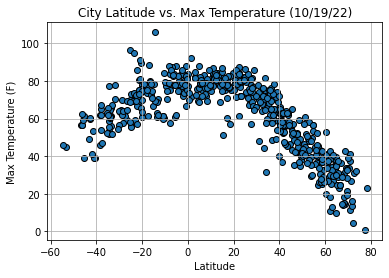

In [151]:
# Create a scatter plot for latitude vs Temperature
plt.scatter(city_data["Lat"],city_data["Max Temp"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Max Temperature (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Output_data/City_Lat_Max_Temp.png")

# Show Plot
plt.show()



# Latitude vs. Humidity Plot

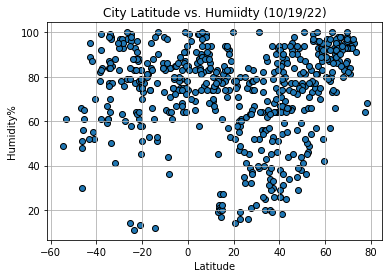

In [152]:
# Create a scatter plot for latitude vs Humidity
plt.scatter(city_data["Lat"],city_data["Humidity"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Humiidty (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity%")

# Save the figure
plt.savefig("Output_data/City_Lat_Humidity.png")

# Show Plot
plt.show()


# Latitude vs. Cloudiness Plot

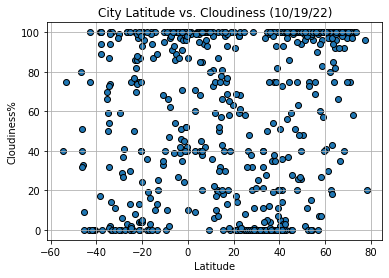

In [153]:
# Create a scatter plot for latitude vs Cloudiness
plt.scatter(city_data["Lat"],city_data["Cloudiness"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Cloudiness (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")

# Save the figure
plt.savefig("Output_data/City_Lat_Cloudiness.png")

# Show Plot
plt.show()


# Latitude vs. Wind Speed Plot

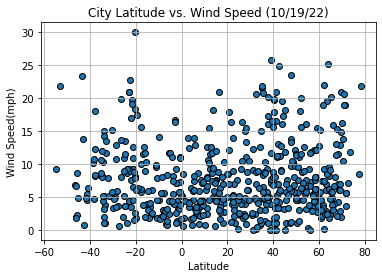

In [154]:
# Create a scatter plot for latitude vs Wind Speed
plt.scatter(city_data["Lat"],city_data["Wind Speed"],marker='o',edgecolors="black")
plt.title("City Latitude vs. Wind Speed (10/19/22)")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save the figure
plt.savefig("Output_data/City_Lat_WindSpeed.png")

# Show Plot
plt.show()


# Linear Regression

In [155]:
# Find the latitude values >=0 for Northern Hemisphere using loc
north_data = city_data.loc[city_data["Lat"]>=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
north_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,62.2266,41.92,78,80,21.97
2,42.0970,55.71,59,0,13.02
5,56.6709,24.85,85,99,7.31
6,64.3833,33.46,90,92,8.14
7,42.6001,46.89,69,5,3.40


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8001350081393834


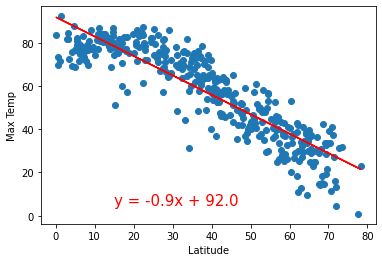

In [156]:
# Perform a linear regression on Maximum temperature vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(15,5),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
# print(rvalue**2)
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [157]:
# Find the latitude <=0 for Southern Hemisphere using loc
south_data = city_data.loc[city_data["Lat"]<=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
south_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,-40.8135,39.16,70,0,6.44
3,-42.7826,59.90,89,100,0.76
4,-53.1500,44.71,61,75,21.85
10,-41.1456,38.95,52,0,4.61
11,-33.6500,65.66,50,0,3.85


The r-value is 0.4644372285259961


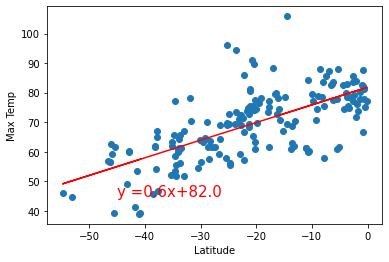

In [158]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,45),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.04551519976835763


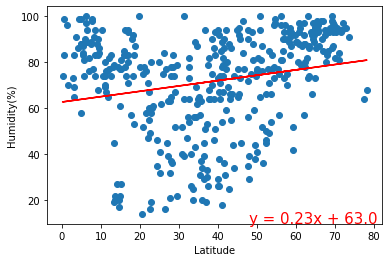

In [159]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.016005368922615604


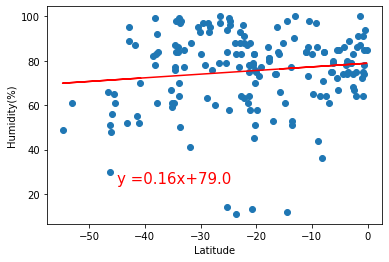

In [160]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.049109415432968165


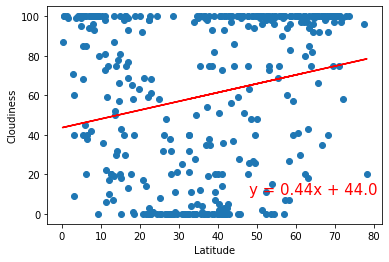

In [161]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.041957311193279966


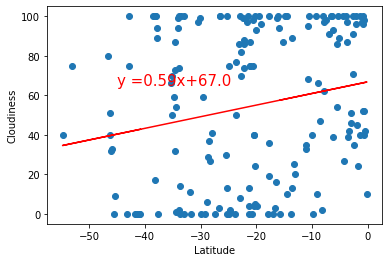

In [162]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,65),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.032886317076067866


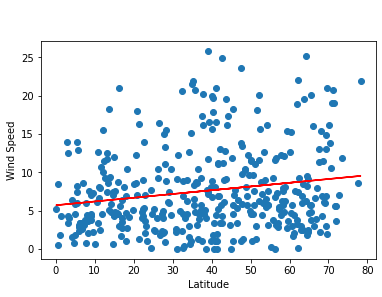

In [163]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(5,30),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.035276771666586895


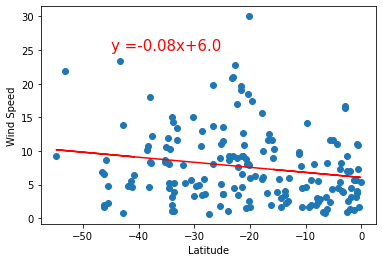

In [164]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()